# Introduction to Matplotlib
This notebook gives a short introduction to *Matplotlib*, Python's most popular package for plotting. Although many different plotting packages exist in the Python ecosystem (see [this talk](https://www.youtube.com/watch?v=FytuB8nFHPQ) for an overview), Matplotlib is arguably the most versatile and flexible. Here, we will give you a short tour of Matplotlib's most important features.

## Contents
1. The state-based approach
2. The object-oriented approach
3. Subplots (optional)

Most of the plotting functionality is contained in the subpackage `pyplot`, which is usually imported as follows:

In [1]:
import matplotlib.pyplot as plt  # nice and short

Somewhat confusingly, Matplotlib has two interfaces for plotting: a state-based approach that mimicks Matlab's way of plotting and a more "Pythonic" object-oriented approach. As Matplotlib recommends using the object-oriented approach, we will spend most time on this approach. But you'll often see the state-based approach as well, so we'll start with quickly discussing this approach.

## The state-based approach
As mentioned, the state-based approach is a lot like the way plotting is done in Matlab: you call different *functions* that each take care of an aspect of the plot. In Matplotlib, most of these functions are contained in the `pyplot` package. Let's create simple line plot to show how the state-based approach looks like:

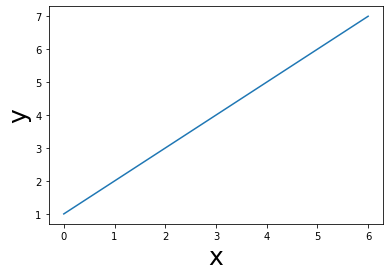

In [2]:
x = [0, 1, 2, 3, 4, 5, 6]
y = [1, 2, 3, 4, 5, 6, 7]

plt.plot(x, y)  # plot the data
plt.xlabel('x', fontsize=25)  # set the x-axis label
plt.ylabel('y', fontsize=25)  # set the y-axis label
plt.show()  # this actually visualizes the plot

As you can see, the state-based approach entails a series of function calls (such as `plt.plot` and `plt.xlabel`). After you are done plotting, you just call `plt.show` and the plot will show in your notebook (or an external image viewer if you run it from a script). Note that, technically, the `plt.show` call is not necessary to render the plot in Jupyter notebooks, but we recommend doing it anyway as this is good practice.

The `plt.plot` function is perhaps the most basic function, which can be used to create any plot of paired datapoints (x, y). By default, it creates a line plot (as shown above), but the many (optional) parameters in `plt.plot` allow you to create many different variations! For example, instead of a line, we can plot the data as separate red points by specifying the format in the third argument (here, 'o' to indicate points) and the color (by setting the argument `c`, for **c**olor, to "red"):

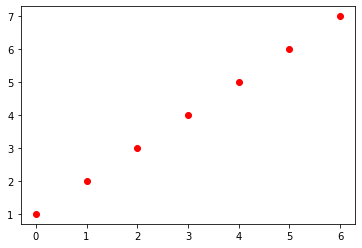

In [3]:
plt.plot(x, y, 'o', c='red')
plt.show()

<div class='alert alert-success'>
    <b>Tip</b>: Note that the third argument, the "format", may be used to specify three things at once: whether you want "markers" (and which type of marker), whether you want a line (and which type of line), and which color the markers/line should have. So, to create red markers, you may specify "or" ("o" for circles as markers and "r" for red). To create a blue line, you may specify "-b". To create a yellow ("y") dotted line ("-.") with stars ("*") as markers, you may use "*-.y".
</div>

<div class='alert alert-warning'>
    <b>ToDo</b>: Create the same plot as above, but with a green dashed line with diamonds as markers. Check out the <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html">plt.plot</a> documentation under "Notes" which particular linestyle you need for this! And check <a href="https://matplotlib.org/api/markers_api.html">this page</a> to see the name of the marker for diamonds! Make sure to write your code <b>above</b> the "<tt>ax2check = plt.gca()</tt>" snippet &mdash; we use this to check your plot automatically in the test cell! Also, do not include a <tt>plt.show</tt> call; this is done after the <tt>ax2check</tt> line (calling <tt>plt.show</tt> before <tt>ax2check</tt> will cause to test cell to malfunction).
</div>

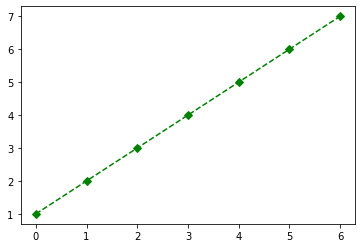

In [4]:
""" Implement the ToDo here. """
### BEGIN SOLUTION
plt.plot(x, y, 'D--g')
### END SOLUTION

# Do not remove the code below!
ax2check = plt.gca()
plt.show()

In [5]:
""" Tests the ToDo above. """
line = ax2check.get_lines()[0]
if not line._color in ['g', 'green']:
    raise ValueError("The line is not green!")

if line._linestyle != '--':
    raise ValueError("You didn't use a dashed line!")

if line._marker._marker != 'D':
    raise ValueError("You didn't use a dashed line!")

print("Yay! Well done.")

Yay! Well done.


You can also plot multiple things within a single plot! Just call the `plt.plot` (or any other plotting function) multiple times. Below, we create a new variable (`y_sq`, the values of squared) and plot it in the same plot as our regular (x, y) plot. Importantly, we will include legend with the plot showing what each line represents using `plt.legend`:

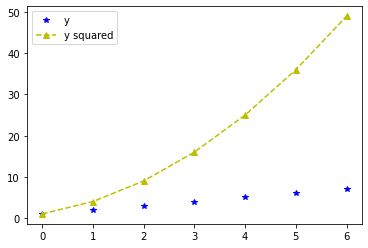

In [6]:
y_sq = [yi ** 2 for yi in y]  # check out this list comprehension!

plt.plot(x, y, '*b')  # only plot markers (*) in blue
plt.plot(x, y_sq, '^--y')  # plot both markers (^) and a line (--) in yellow

# Note that the plt.legend function call should come *after* the plotting calls
# and you should give it a *list* with strings
plt.legend(['y', 'y squared'])
plt.show()

<div class='alert alert-danger'>
    <b>Warning</b>: Importantly, in the context of Jupyter notebooks, each part of the plot should be defined in the same code cell; otherwise, they won't be included in the same figure.
</div>

As you can see, Matplotlib automatically creates the right legend! Make sure that the order of your labels (here: `['y', 'y squared']`) matches the order of your plotting calls!

<div class='alert alert-success'>
    <b>Good to know</b>: If you plot multiple things in the same plot, Matplotlib will automatically choose a different color for the different things (first one is blue, second one is orange, third one is green, etc.). 
</div>

<div class='alert alert-warning'>
    <b>ToDo</b>: Below, we define some new variables: <tt>z</tt>, the sine of z (<tt>sin_z</tt>), and the cosine of z (<tt>cos_z</tt>). Plot both the (<tt>z</tt>, <tt>sin_z</tt>) and (<tt>z</tt>, <tt>cos_z</tt>) collections as separate dashed lines in whatever (different) colors you like. Make sure to add a legend!
</div>

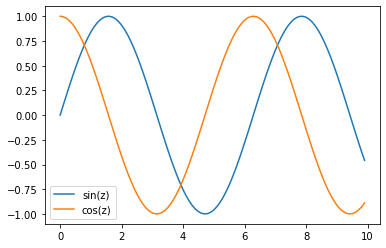

In [7]:
""" Implement your ToDo below. """
import math
z = [zi / 10 for zi in list(range(100))]
sin_z = [math.sin(zi) for zi in z]
cos_z = [math.cos(zi) for zi in z]

### BEGIN SOLUTION
plt.plot(z, sin_z)
plt.plot(z, cos_z)
plt.legend(["sin(z)", "cos(z)"])
### END SOLUTION

# Do not remove the code below and implement your code *above* this snippet
ax2check = plt.gca()
plt.show()

In [8]:
""" Tests the ToDo above. """
lines = ax2check.get_lines()
if len(lines) != 2:
    raise ValueError(f"I expected 2 lines but found {len(lines)}!")

leg = ax2check.get_legend()
if leg is None:
    raise ValueError("You didn't include a legend!")

n_leg = len(leg.get_lines())
if n_leg != 2:
    raise ValueError("I expected two things in the legend but found {n_leg}!")
    
print("Good job!")

Good job!


There are several other things that you can add to or tweak in your plot. For example, you can add a title with `plt.title` or you can change the default ticks and tick labels using `plt.xticks` (for the x-axis ticks/tick labels) and `plt.yticks` (for the y-axis ticks/tick labels). An example:

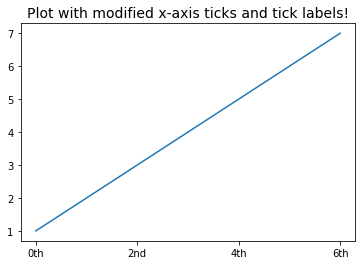

In [9]:
plt.title("Plot with modified x-axis ticks and tick labels!", fontsize=14)
plt.plot(x, y)
plt.xticks([0, 2, 4, 6], ['0th', '2nd', '4th', '6th'])
plt.show()

And you can control the range of the axes by the functions `plt.xlim` and `plt.ylim`:

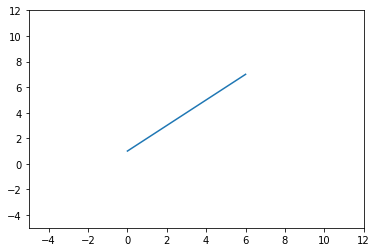

In [10]:
plt.plot(x, y)
plt.xlim(-5, 12)
plt.ylim(-5, 12)
plt.show()

### Different plot functions
Of course, `plt.plot` is not the only plotting functions! There are many different plotting functions in Matplotlib, including scatterplots:

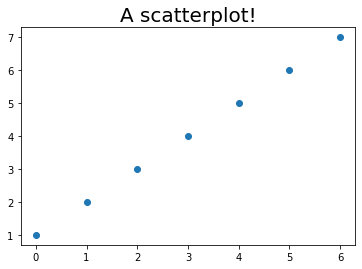

In [11]:
plt.title("A scatterplot!", fontsize=20)
# Note that this is equivalent to plt.plot(x, y, 'o') !
plt.scatter(x, y)
plt.show()

... and bar graphs:

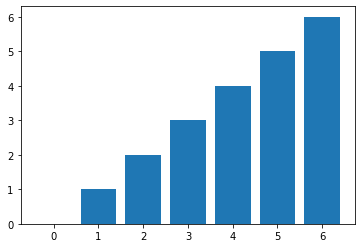

In [12]:
# First argument determines the location of the bars on the x-axis
# and the second argument determines the height of the bars
plt.bar(x, x)
plt.show()

... and histograms:

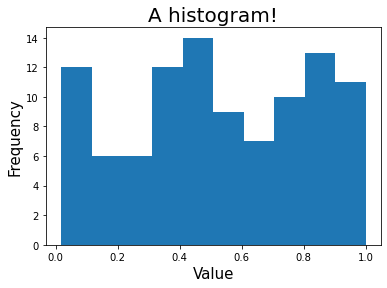

In [13]:
# Let's generate some random data
import random
random_unif = [random.uniform(0, 1) for _ in range(100)]

plt.title("A histogram!", fontsize=20)
plt.hist(random_unif)
plt.xlabel("Value", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.show()

<div class='alert alert-warning'>
    <b>ToDo</b>: Below, we again simulate some random data, but this time not from a uniform distribution, but from a normal distribution (with mean 0.5 and a standard deviation of 0.15). Plot both the uniform data (<tt>random_unif</tt>) and the normal data (<tt>random_norm</tt>) in the same plot, but with different colors (doesn't matter which). Make sure to use 10 bins for each histogram and make sure they are slightly transparent by setting the "alpha" level to 0.5 in both. Also, make sure the ticks and xtick labels are spaced 0.1 apart (i.e., a tick and label at 0, at 0.1, ..., until 1.0). And add a legend! To find out how to set the number of bins and the alpha level, check out the <a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html">documentation</a>!
</div>

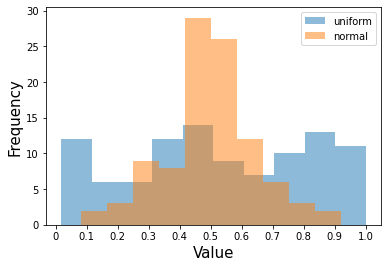

In [14]:
""" Implement the ToDo here! """
random_norm = [random.normalvariate(0.5, 0.15) for _ in range(100)]

### BEGIN SOLUTION
plt.hist(random_unif, alpha=0.5, bins=10)
plt.hist(random_norm, alpha=0.5, bins=10)
plt.legend(['uniform', 'normal'])
plt.xlabel("Value", fontsize=15)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
           [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.ylabel("Frequency", fontsize=15)
### END SOLUTION

# Do not remove the code below
ax2check = plt.gca()
plt.show()

In [15]:
""" Tests the ToDo above. """
import matplotlib
rect = [ch for ch in ax2check.get_children() if ch.__class__ == matplotlib.patches.Rectangle]
if len(rect) != 21:
    raise ValueError(f"I expected 20 bins in total (10 per histogram), but found {len(rect) - 1}!")

if rect[0]._alpha != 0.5:
    raise ValueError(f"The alpha level is not 0.5 (but {rect[0]._alpha})!")

leg = ax2check.get_legend()
if leg is None:
    raise ValueError("I couldn't find a legend!")


if len(ax2check.get_xticks()) != 11:
    raise ValueError("There should be 11 x-axis ticks and labels!")
    
if not all(ax2check.get_xticks() == [i / 10 for i in list(range(11))]):
    raise ValueError("The x-axis ticks and tick labels are not yet correct ...")

print("Awesome!")

Awesome!


## The object-oriented interface
The state-based plotting approach is easy to learn and pretty straightforward, but when you start creating more complex visualizations, you'll notice that the alternative "object-oriented" approach becomes easier to use. In this section, we will explain this approach by recreating some of the previous plots from the state-based section. We will also discuss some more advanced plotting techniques, such as creating subplots.

Now, within the object-oriented approach, we can explain some of the more technical (but important!) concepts. One of those is that each Matplotlib plot consists of a `Figure` object and one or more `Axes` objects. Essentially, the `Figure` object represents the entire canvas that defines the, well, figure. The `Axes` object(s) contains the actual visualizations that you want to include in the `Figure` (see figure below). Importantly, there may be one *or* multiple `Axes` object within a given `Figure` (e.g., two line plots next to each other). 

![mpl2](https://files.realpython.com/media/fig_map.bc8c7cabd823.png)

*Figure from Brad Solomon, from [https://realpython.com/python-matplotlib-guide/](https://realpython.com/python-matplotlib-guide/)*

<div class='alert alert-danger'>
    <b>Warning</b>: Note that an <tt>Axes</tt> object is something different than the x-axis and y-axis ("axes") of a plot! 
</div>

Importantly, a `Figure` object by itself doesn't do anything. It just defines the canvas to drawn on, so to speak. `Figure` objects can be initialized using `plt.figure`, which takes several (optional) arguments like `figsize` (width and height in inches) and `dpi` ("dots per inch", i.e., resolution). Let's take a look:

In [16]:
fig = plt.figure(figsize=(8, 4))
plt.show()

<Figure size 576x288 with 0 Axes>

As you can see, nothing happens. We also need an `Axes` object! We can create this using `plt.axes`. Note that, even in the object-oriented appoach, we need the function `plt.show` to render the figure.

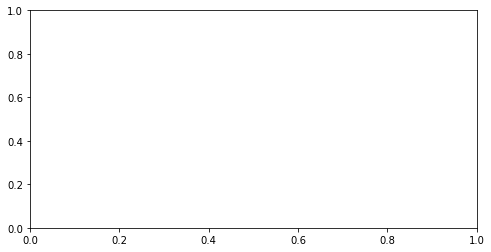

In [17]:
fig = plt.figure(figsize=(8, 4))
ax = plt.axes()
plt.show()

Instead of creating the `Figure` and `Axes` objects separately, we highly recommend using the function `plt.subplots` to create them both at the same time. Like the name suggests, this function also allows you to create multiple subplots (across different `Axes`), which we'll discuss later. For now, we'll just use it to create a `Figure` and `Axes` object at once. Note that all arguments for creating `Figures` using `plt.figure` also work for `plt.subplots`. For example, you can give `plt.subplots` the arguments `figsize=(8, 4)` and `dpi=200` (these must be specified with keywords, however)! Check out the [full documentation] of `plt.subplots` to get an idea about the different arguments it accepts.

Anyway, let's take a look: 

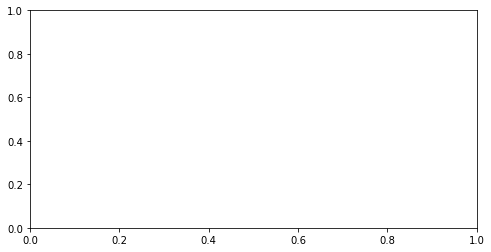

In [18]:
fig, ax = plt.subplots(figsize=(8, 4))
plt.show()

Alright, great, but it's still an empty canvas! Now, we could of course plot some data using the state-based interface (e.g., `plt.plot(x, y)`). Here, however, we will use the object-oriented approach. The only difference between these two approaches is that plotting in the object-oriented approach is done through the *methods* of the `Ax` object instead of the functions from the `pyplot` module. An example:

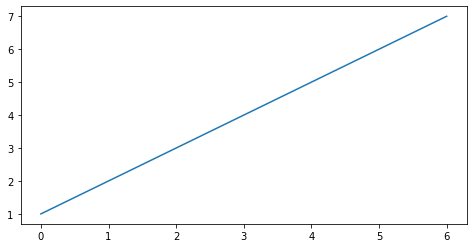

In [19]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, y)  # here, `plot` is a method, not a function!
plt.show()

Basically all functions from the state-based interface are available as methods in the object-oriented approach. For example, to create a legend, run `ax.legend` (instead of `plt.legend`):

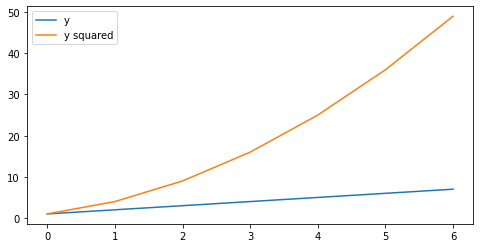

In [20]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, y)
ax.plot(x, y_sq)
ax.legend(['y', 'y squared'])
plt.show()

Some `pyplot` functions (like `plt.xlabel`), however, are prefixed with `set_` in the object-oriented interface (e.g., `ax.set_xlabel`):

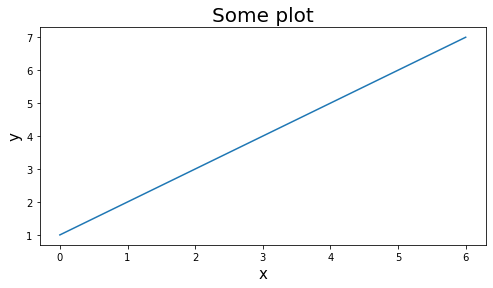

In [21]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, y)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title("Some plot", fontsize=20)
plt.show()

Okay, time for an exercise!

<div class='alert alert-warning'>
    <b>ToDo</b>: Below, using a so-called "random walk", we create some random numbers representing two time series. Let's pretend that this data represents the stock price of two companies (Tesla and Shell) across 100 consecutive days. Create a <tt>Figure</tt> of 12 (width) by 4 (height) inches and a single <tt>Axes</tt> onto which you plot this time series data (as lines). Label the axes appropriately and set the range of the x-axis from 1 to 100.
</div>

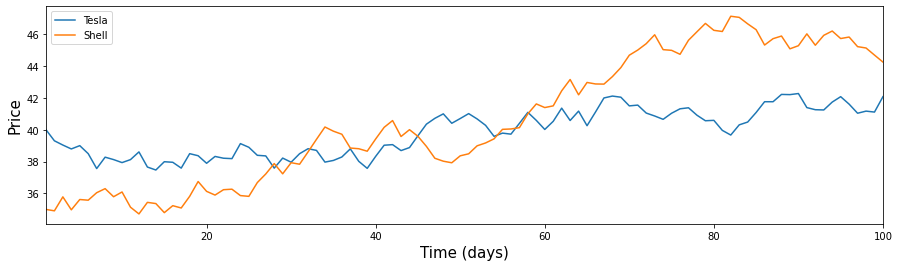

In [22]:
""" Implement the ToDo here. """
steps1 = [random.uniform(-1, 1) for _ in range(100)]
steps2 = [random.uniform(-1, 1) for _ in range(100)]

tesla = [40 + sum(steps1[:i]) for i in range(100)]
shell = [35 + sum(steps2[:i]) for i in range(100)]
days = list(range(1, 101))

### BEGIN SOLUTION
fig, ax = plt.subplots(figsize=(15, 4))
ax.plot(days, tesla, '-')
ax.plot(days, shell, '-')
ax.set_xlim(1, 100)
ax.set_xlabel('Time (days)', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.legend(['Tesla', 'Shell'])
### END SOLUTION

# Do not remove the code below
ax2check = plt.gca()
plt.show()

In [23]:
""" Tests the above ToDo. """
lines = ax2check.get_lines()
if len(lines) != 2:
    raise ValueError(f"I expected two lines, but I saw {len(lines)}!")
    
if ax2check.get_legend() is None:
    raise ValueError("There is no legend!")

if not ax2check.get_xlabel():
    raise ValueError("There is no label for the x-axis!")
    
if not ax2check.get_ylabel():
    raise ValueError("There is no label for the y-axis!")

print("YES! Well done!")

YES! Well done!


Okay, one last thing we want to show you is how to save figures to disk! In the object-oriented interface, you can save figures using the `Figure` method `savefig` (check out its [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html)). The only mandatory argument is a filename, including an extension. The extension determines as which file type the figure is saved. If you want to save a figure as a PNG file, you can for example do the following:

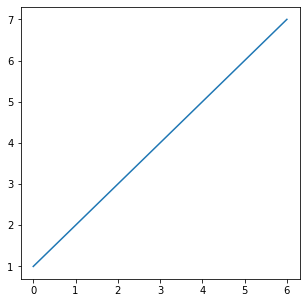

In [24]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x, y)
plt.show()
fig.savefig('my_awesome_figure.png')

This actually created a new file, "my_awesome_figure.png", in our current directory. We can double-check this using the command `!ls`, which is some Jupyter magic that allows us to use a code cell as a terminal temporarily:

In [25]:
!ls

0_introduction.ipynb        example_file.py
1_python_basics.ipynb       example_module.py
2_matplotlib.ipynb          example_script.py
3_pandas.ipynb              my_awesome_figure.png
4_numpy.ipynb               solution_sine_wave_plot.png
__pycache__                 tests.py
assignment_week1.ipynb      utils.py
example_data.csv


## Subplots (optional)
In this optional section, we will discuss figures with "subplots", i.e., figures with more than one `Axes` object! The easiest way to do this is to use the `plt.subplots` function. This function accepts the arguments `ncols` and `nrows` to create a figure with multiple `Axes` next to each other (`ncols` > 1) or below each other (`nrows` > 1). For example, suppose that I want to create a figure with three plots next to each other:

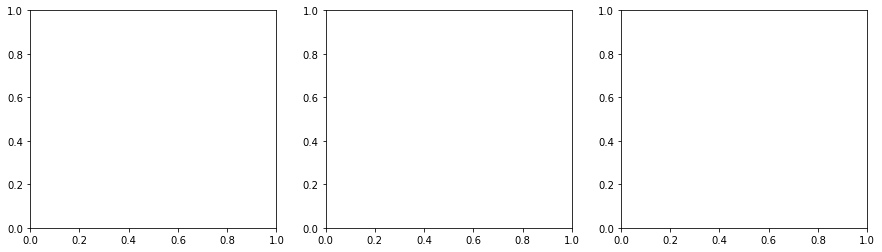

In [26]:
# Note that I use the variable name "axes" here instead of "ax" like before
# This is not necessary, but I find it helpful because it tells me this variable contains
# more than one axis
fig, axes = plt.subplots(ncols=3, figsize=(15, 4))
plt.show()

The variable `axes` is slightly different from what we've seen before. Let's check out its type:

In [27]:
type(axes)

numpy.ndarray

When you create a figure with more than one `Axes` object, the function `plt.subplots` returns a so-called *numpy* ndarray with `Axes` ("ndarray" stands for *N*-dimensional array). Numpy arrays are data structures that we discuss at length in the last (optional) notebook of this week. For now, you can interpret numpy arrays as (in this case) one or two-dimensional lists. To access the individual `Axes` objects from the numpy array, we can index them as if they are lists. For example:

In [28]:
first_ax = axes[0]

Now, let's plot some stuff in our different `Axes` objects.

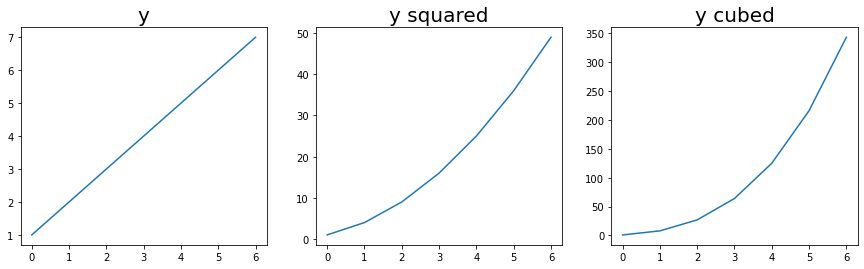

In [29]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 4))
axes[0].plot(x, y)
axes[1].plot(x, [yi ** 2 for yi in y])
axes[2].plot(x, [yi ** 3 for yi in y])
names = ['y', 'y squared', 'y cubed']
for i, name in enumerate(names):
    axes[i].set_title(name, fontsize=20)

plt.show()

<div class='alert alert-warning'>
    <b>ToDo</b>: As you probably have noticed by now, if you don't explicitly give Matplotlib a range for the axes (using <tt>xlim</tt> and <tt>ylim</tt>), it will chose a suitable range itself, which results in separate ranges for the subplots in the above figure. To force the same range across subplots, set the arguments <tt>sharex</tt> and/or <tt>sharey</tt> to <tt>True</tt> in the <tt>plt.subplots</tt> call. Do this in the previous code cell to force the same range across the y-axes!
</div>

We can, of course, create figures with multiple columns *and* multiple rows. For example, to create a 2 by 2 grid of `Axes`, we can do the following:

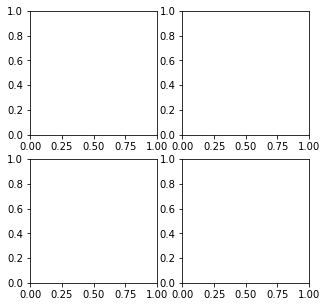

In [30]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(5, 5))
plt.show()

<div class='alert alert-success'>
    <b>Tip</b>: Sometimes, like in the figure above, subplots may overlap slightly, especially in small figures. Matplotlib has a neat function to fix this: <tt>plt.tight_layout</tt>. Try adding it to the code cell above (after the <tt>plt.subplots</tt> line but before the <tt>plt.show()</tt> line).
</div>

Currently, the `axes` variable is a two-dimensional numpy array (because it has both multiple columns and multiple rows). We can double-check this by checking out the `shape` attribute from the numpy array:

In [31]:
axes.shape

(2, 2)

Now, to access the individual `Axes` objects from this numpy array, we need two indices: one to indicate the row and one to indicate the column. For example, to get the upper left `Axes` object (i.e., first row, first column), we do:

In [32]:
upper_left_ax = axes[0, 0]

To get the upper right `Axes` object (i.e., first row, second column), we do:

In [33]:
upper_right_ax = axes[0, 1]

<div class='alert alert-warning'>
    <b>ToDo</b>: Extract the lower right <tt>Axes</tt> object and store it in a variable named <tt>lower_right_ax</tt>
</div>

In [34]:
""" Implement the ToDo here. """
### BEGIN SOLUTION
lower_right_ax = axes[1, 1]
### END SOLUTION

In [35]:
""" Tests the above ToDo. """
if lower_right_ax != axes.flatten()[-1]:
    raise ValueError("That is not the correct Axes object ...")

print("Well done!")

Well done!


Alright, there is not much more to subplots that we explained here! Let's finish with a difficult exercise for those that want a challenge. From trigonometry, you may remember we can how to create a sine wave with a particular amplitude and frequency. Below, we included a function, `create_sine_wave`, which takes in a list of timepoints, a desired frequecy, and a desired amplitude:

In [36]:
def create_sine_wave(timepoints, frequency=1, amplitude=1):
    """ Creates a sine wave with a given frequency and amplitude for a given set of timepoints. 
    
    Parameters
    ----------
    timepoints : list
        A list with timepoints (assumed to be in seconds)
    frequency : int/float
        Desired frequency (in Hz.)
    amplitude : int/float
        Desired amplitude (arbitrary units)
        
    Returns
    -------
    sine : list
        A list with floats representing the sine wave
    """
    sine = [amplitude * math.sin(2 * math.pi * frequency * t) for t in timepoints]
    return sine

Given some timepoints, we can plot its corresponding sine wave:

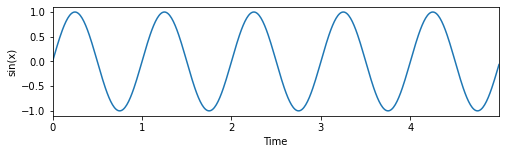

In [37]:
timepoints = [i / 100 for i in range(500)]
sine = create_sine_wave(timepoints)

fig, ax = plt.subplots(figsize=(8, 2))
ax.plot(timepoints, sine)
ax.set_xlabel("Time")
ax.set_ylabel("sin(x)")
ax.set_xlim(0, max(timepoints))
plt.show()

We already created a quite complicated figure with 9 subplots (3 rows, 3 columns), which shows a sine wave with increasing frequencies (1, 3, 5) across columns and increasing amplitudes across rows (1, 2, 4). We'll show this figure below:

![sines](solution_sine_wave_plot.png)

<div class='alert alert-warning'>
    <b>ToDo</b>: Try to recreate the figure above with your own code! Use a <tt>figsize</tt> of (10, 10). Good luck! (No test cell)
</div>

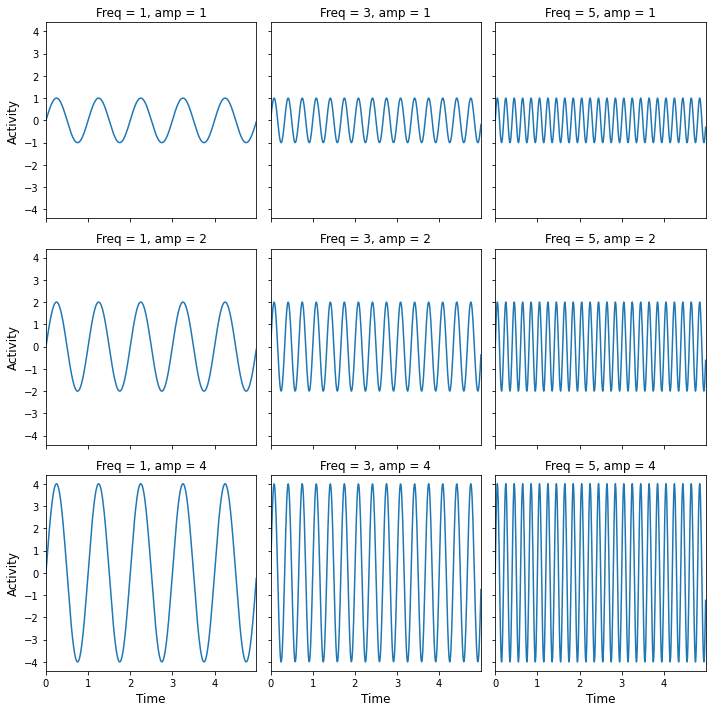

In [38]:
""" Implement your ToDo here. """
### BEGIN SOLUTION
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(10, 10), sharex=True, sharey=True)
amps = [1, 2, 4]
freqs = [1, 3, 5]
for i in range(len(amps)):
    for ii in range(len(freqs)):
        sine = create_sine_wave(timepoints, frequency=freqs[ii], amplitude=amps[i])
        axes[i, ii].plot(timepoints, sine)
        axes[i, ii].set_title(f"Freq = {freqs[ii]}, amp = {amps[i]}")
        axes[i, ii].set_xlim(0, max(timepoints))
        if ii == 0:
            axes[i, ii].set_ylabel("Activity", fontsize=12)
            
        if i == 2:
            axes[i, ii].set_xlabel("Time", fontsize=12)

fig.tight_layout()
plt.show()
fig.savefig('solution_sine_wave_plot.png')
### END SOLUTION